#### PROBLEM STATEMENT
    We have problem in lending the Credit  to barrowers, where they are able to pay back the money on time ,The goal of project 
    is to build predictive modeling for credit lenders that predicts the risk of lending the Money

#### OBJECTIVE OF PROBLEM
    By Building the predictive Modeling we can reducess the risk of credit lending  and help the organisation Business

# DATA DESCRIPTION:

1.LoanNr_ChkDgt:
    The unique Number of the loan application
    
2.Name:
   Borrower name

3.City:
    City of Customer 
    
4.State:
    State of Customer 
    
5 Bank:
  Name of Bank which the customer has applied for the loan

5.BankState:
   In which state bank is located
   
6.NAICS:
   North American Industry Classification System code
 
7.ApprovalDate:
   Date SBA commitment issued
  
8.ApprovalFY:
   Fiscal year of commitment
   
9.Term:
   Loan term in months

10.NoEmp:
   	Number of business employees
    
11.NewExist:
    1 = Existing business, 2 = New business

12.CreateJob :
     Number of jobs created

13.RetainedJob:
   	Number of jobs retained
    
14.FranchiseCode:
   Franchise code, (00000 or 00001) = No franchise
   
15.UrbanRural:
   1 = Urban, 2 = rural, 0 = undefined
   
16.RevLineCr:
   Revolving line of credit: Y = Yes, N = No
   
17.LowDoc:
   LowDoc Loan Program: Y = Yes, N = No
   
18.ChgOffDate:
   The date when a loan is declared to be in default
   
19.DisbursementDate:
   Disbursement date
   
20.DisbursementGross:
   Amount disbursed
   
21.BalanceGross:
   Gross amount outstanding
   
22.MIS_Status:
    Loan status charged off = CHGOFF, Paid in full =PIF
    
23.ChgOffPrinGr:
   Charged-off amount

24.GrAppv:
   Gross amount of loan approved by bank
   
   
25.SBA_Appv:
   SBA’s guaranteed amount of approved loan


##### STEPS OF PROJECT

1.READING THE DATA

2.DATA PREPARATION

3.EDA

4.HYPOTHESIS TESTING

5.DATA PREPROCESSING

6.MODEL BUIDING

7.FEATURE SELECTION

##### 1.READING THE DATA

##### 1.1 Importing basic packages

In [1]:
import numpy as np
import pandas as pd
from numpy import median
from numpy import std
from numpy import mean
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

###### 1.2 loading the dataset

In [2]:
df=pd.read_csv('SBAnational.csv',low_memory=False)

In [3]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [4]:
#check the shape of dataset
print("The total number of rows are {}".format(df.shape[0]))
print("The total number of columns are {}".format(df.shape[1]))

The total number of rows are 899164
The total number of columns are 27


In [5]:
#check the datypes of datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [6]:
#check the columns
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [7]:
#check the null values in dataset
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

###### Observation:
    Below columns have null values
    1.Name 
    2.City
    3.State 
    4.Bank 
    5.BankState    
    5.NewExist
    6.RevLineCr
    7.LowDoc
    8.ChgOffDate
    9.DisbursementDate
    10.MIS_Status 

In [8]:
#check the duplicates
df.duplicated().sum()

0

###### Observation:
    No duplicates availables

In [9]:
#check the stastics summary of the data
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


###### Observation:
    1.The highest Tenure of loan is 569 months and average tenure of loa is 111 months
    2. Some barrowers created 8800 jobs that is massive
    3.Average Barrowers employees are 11 and highest is 9999 , by this many big companies have barrowed money
    4.Avg jobs retainedare 11 and highest is 9500 ,by this there is huge outliers in feature
    
     

## 2. Data cleaning

In [10]:
#segregate the dataset by numerical columns and categorical datatypes
categorical_features=df.select_dtypes(include='O').columns
numerical_features=df.select_dtypes(exclude='O').columns

In [11]:
#check any strange values in the categorical features
for i in categorical_features:
    print(i)
    print(df[i].value_counts(dropna=False))
    print("="*20)

Name
SUBWAY                            1269
QUIZNO'S SUBS                      433
COLD STONE CREAMERY                366
QUIZNO'S                           345
DOMINO'S PIZZA                     329
                                  ... 
Mohammad N. Hassan (epc) for C       1
N.J. Yellow Tale Flower              1
CEF INC.                             1
SCANNELL AND ASSOCIATES LP           1
PACIFIC TRADEWINDS FAN & LIGHT       1
Name: Name, Length: 779584, dtype: int64
City
LOS ANGELES                       11558
HOUSTON                           10247
NEW YORK                           7846
CHICAGO                            6036
MIAMI                              5594
                                  ...  
EL DORADO SPRINGS (ELDORADO SP        1
HUNTINDON                             1
LEBAHON                               1
WILLOW RIVER                          1
SO. OZONE PARK                        1
Name: City, Length: 32582, dtype: int64
State
CA     130619
TX      70458
NY    

In [12]:
#lets investigate the feature
df['RevLineCr'].value_counts()

N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: RevLineCr, dtype: int64

##### 2.1 RevLineCr

In [13]:
from numpy import nan

In [14]:
#cleaning the starnge values
df['RevLineCr']=df['RevLineCr'].replace({'0':'N','1':'Y','T':np.nan,'R':np.nan,'`':np.nan,'2':np.nan,'3':np.nan,',':np.nan,
                                        '7':np.nan,'A':np.nan,'5':np.nan,'4':np.nan,'-':np.nan,'Q':np.nan,'C':np.nan,'.':np.nan})
        

In [15]:
df['LowDoc'].value_counts()

N    782822
Y    110335
0      1491
C       758
S       603
A       497
R        75
1         1
Name: LowDoc, dtype: int64

##### LowDoc

In [16]:
#cleaning the starnge values
df['LowDoc']=df['LowDoc'].replace({'0':'N','1':'Y','C':np.nan,'S':np.nan,'A':np.nan,'R':np.nan})

###### NewExist

###### DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv


In [17]:
df['DisbursementGross'].unique()

array(['$60,000.00 ', '$40,000.00 ', '$287,000.00 ', ..., '$377,446.00 ',
       '$123,770.00 ', '$1,086,300.00 '], dtype=object)

In [18]:
import re
def data_cleaning(data):
    if isinstance(data,str):
        new_data=re.sub(r'[$,]',"",data)
        return new_data
    else:
        return data
        

In [19]:
df['DisbursementGross']=df['DisbursementGross'].apply(data_cleaning)
df['BalanceGross']=df['BalanceGross'].apply(data_cleaning)
df['ChgOffPrinGr']=df['ChgOffPrinGr'].apply(data_cleaning)
df['GrAppv']=df['GrAppv'].apply(data_cleaning)
df['SBA_Appv']=df['SBA_Appv'].apply(data_cleaning)


##### 2.2 Converting the features

In [20]:
df['BalanceGross']=df['BalanceGross'].astype(float)
df['ChgOffPrinGr']=df['BalanceGross'].astype(float)
df['GrAppv']=df['GrAppv'].astype(float)
df['SBA_Appv']=df['SBA_Appv'].astype(float)
df['DisbursementGross']=df['DisbursementGross'].astype(float)

###### 2.1 Check the Null values

In [21]:
#check the missing percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100

In [22]:
missing_percentage

LoanNr_ChkDgt         0.000000
Name                  0.001557
City                  0.003336
State                 0.001557
Zip                   0.000000
Bank                  0.173383
BankState             0.174162
NAICS                 0.000000
ApprovalDate          0.000000
ApprovalFY            0.000000
Term                  0.000000
NoEmp                 0.000000
NewExist              0.015125
CreateJob             0.000000
RetainedJob           0.000000
FranchiseCode         0.000000
UrbanRural            0.000000
RevLineCr             2.208051
LowDoc                0.502133
ChgOffDate           81.905526
DisbursementDate      0.263356
DisbursementGross     0.000000
BalanceGross          0.000000
MIS_Status            0.222095
ChgOffPrinGr          0.000000
GrAppv                0.000000
SBA_Appv              0.000000
dtype: float64

##### observation:
    1.ChgOffDate has 81.9% missing data so drop the column
    2.RevLInerCr has 2.2% of missing values
    3.Lets drop the values because the size dataset is more
    

In [23]:
df.drop('ChgOffDate',axis=1,inplace=True)

In [24]:
#drop the null values
df.dropna(inplace=True)

In [25]:
df.shape

(869181, 26)

In [26]:
df.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,0,N,Y,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,0,N,Y,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0


In [27]:
df['ApprovalDate']=pd.to_datetime(df['ApprovalDate'])
df['DisbursementDate']=pd.to_datetime(df['DisbursementDate'])


In [28]:
df['Days_took_Disbursement']=df['DisbursementDate']-df['ApprovalDate']

In [29]:
df.drop(['ApprovalDate','DisbursementDate'],axis=1,inplace=True)

## 2.2 Treating Outliers

In [30]:
def treating_outliers(df, column):
    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])
    
    return df[column]


In [31]:
df['Term']=treating_outliers(df,'Term')

In [32]:
df['Term'].unique()

array([ 84.,  60., 180.,  nan, 120.,  45., 162.,  12.,  87., 114., 144.,
       126.,  83., 102.,  80., 137.,  42.,  96., 167.,   7.,  36.,  37.,
        26.,  72.,  24.,   5.,  54.,  66., 161.,  71.,   4.,  93., 108.,
        10.,  13.,  90.,  19.,  16.,   3.,  27., 149.,  41.,  18.,  57.,
       104.,  82.,  14.,  61., 127.,  58.,  44.,  32.,  85.,  48.,  31.,
       112.,  38.,  73.,  47.,  11., 134.,  15.,  79.,  53.,  39.,   6.,
        55.,  95.,  35.,  59.,  62.,  68., 123.,  46.,  70., 138.,  52.,
        25.,  65.,  91.,   1.,  74.,  49., 103.,  77.,  86.,  63.,  56.,
        22.,   0.,  97.,  40.,  23.,  17.,  69.,  21.,  43.,  89.,  92.,
       183.,   2., 132.,  34., 131.,   9.,  78.,  99., 129.,   8.,  29.,
        30., 168., 208.,  81., 147., 125.,  94.,  51.,  64., 111.,  75.,
        28., 119.,  98., 191., 116.,  76., 113., 118.,  88., 166., 176.,
       203., 142.,  33., 157., 165., 210., 106.,  20.,  50., 204., 178.,
       115., 174., 192.,  67., 133., 141., 122., 15

In [33]:
df['NoEmp']=treating_outliers(df,'NoEmp')
print(df['NoEmp'])

0          4.0
1          2.0
2          7.0
3          2.0
4         14.0
          ... 
899159     6.0
899160     6.0
899161     NaN
899162     6.0
899163     1.0
Name: NoEmp, Length: 869181, dtype: float64


In [34]:
df['CreateJob']=treating_outliers(df,'CreateJob')
df['BalanceGross']=treating_outliers(df,'BalanceGross')
df['ChgOffPrinGr']=treating_outliers(df,'ChgOffPrinGr')
df['GrAppv']=treating_outliers(df,'GrAppv')
df['SBA_Appv']=treating_outliers(df,'SBA_Appv')

###### numerical_features

In [35]:
df['NewExist']=df['NewExist'].replace({0.0:np.nan})
df['NewExist'].value_counts()

1.0    623174
2.0    244996
Name: NewExist, dtype: int64

In [36]:
df['NewExist'].dropna()

0         2.0
1         2.0
2         1.0
3         1.0
4         1.0
         ... 
899159    1.0
899160    1.0
899161    1.0
899162    1.0
899163    2.0
Name: NewExist, Length: 868170, dtype: float64

In [37]:
#lets drop non-important features
df.drop(['LoanNr_ChkDgt','Zip','NAICS','ChgOffPrinGr'],axis=1,inplace=True)

In [38]:
df.isnull().sum()

Name                           0
City                           0
State                          0
Bank                           0
BankState                      0
ApprovalFY                     0
Term                      156883
NoEmp                      94923
NewExist                    1011
CreateJob                 144450
RetainedJob                    0
FranchiseCode                  0
UrbanRural                     0
RevLineCr                      0
LowDoc                         0
DisbursementGross              0
BalanceGross                  12
MIS_Status                     0
GrAppv                     81531
SBA_Appv                   86871
Days_took_Disbursement         0
dtype: int64

In [39]:
 #since the varibles are in discreate in natures we mode method
df['Term'].fillna(stats.mode(df['Term']).mode[0],inplace=True)
df['NoEmp'].fillna(stats.mode(df['NoEmp']).mode[0],inplace=True)
df['NewExist'].fillna(stats.mode(df['NewExist']).mode[0],inplace=True)
df['CreateJob'].fillna(stats.mode(df['CreateJob']).mode[0],inplace=True)

#since varibles in continous in nature
df['GrAppv']=df['GrAppv'].fillna(mean(df['GrAppv']))
df['SBA_Appv']=df['SBA_Appv'].fillna(mean(df['GrAppv']))
df['DisbursementGross']=df['DisbursementGross'].fillna(mean(df['GrAppv']))

C:\Users\HOME\AppData\Local\Temp\ipykernel_6788\952699806.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  df['Term'].fillna(stats.mode(df['Term']).mode[0],inplace=True)
C:\Users\HOME\AppData\Local\Temp\ipykernel_6788\952699806.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

# 3.EDA(exploratory data Analyis)

In [40]:
#segregate the numerical features and categorical features
numerical_features=df.select_dtypes(exclude='O').columns
categorical_features=df.select_dtypes(include='O').columns

In [41]:
print("The numerical_features  {} and total number of features {}".format(numerical_features,len(numerical_features)))
print("The categorical_features {} and total number of features {}".format(categorical_features,len(categorical_features)))

The numerical_features  Index(['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'UrbanRural', 'DisbursementGross', 'BalanceGross',
       'GrAppv', 'SBA_Appv', 'Days_took_Disbursement'],
      dtype='object') and total number of features 12
The categorical_features Index(['Name', 'City', 'State', 'Bank', 'BankState', 'ApprovalFY', 'RevLineCr',
       'LowDoc', 'MIS_Status'],
      dtype='object') and total number of features 9


#### 3.1UNIVARIATE ANALYSIS OF NUMERICAL_FEATURES

In [42]:
continous_numerical_variable=[variable for variable in numerical_features if len(df[variable].value_counts())>10]
discrete_numerical_varibale=[variable for variable in numerical_features if not variable in continous_numerical_variable]


In [43]:
continous_numerical_variable

['Term',
 'NoEmp',
 'RetainedJob',
 'FranchiseCode',
 'DisbursementGross',
 'GrAppv',
 'SBA_Appv',
 'Days_took_Disbursement']

##### 3.1.1 DATA VISUALISATION OF continous_numerical_variable

###### Univaraiate analysis

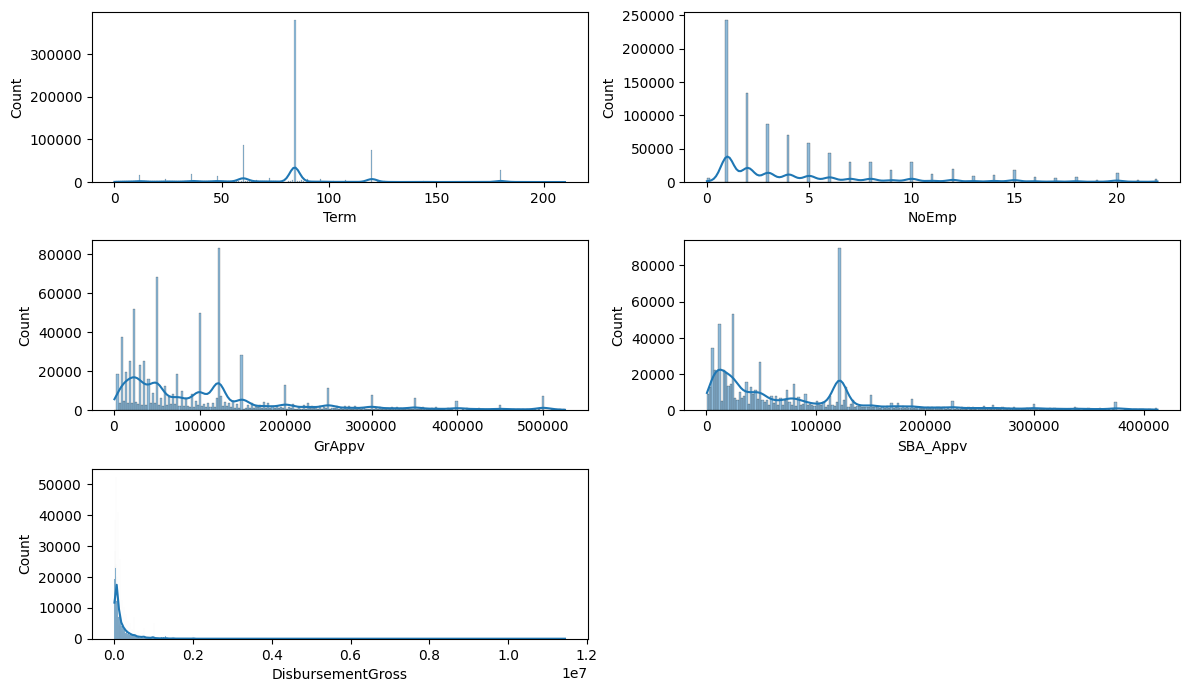

In [44]:
plt.figure(figsize=(12,7))
plt.subplot(321)
sns.histplot(x='Term',data=df,kde=True)
plt.subplot(322)
sns.histplot(x='NoEmp',data=df,kde=True)
plt.subplot(323)
sns.histplot(x='GrAppv',data=df,kde=True)
plt.subplot(324)
sns.histplot(x='SBA_Appv',data=df,kde=True)
plt.subplot(325)
sns.histplot(x='DisbursementGross',data=df,kde=True)
plt.tight_layout()
plt.show()

##### Observation:
    No Emp ,GrAppv ,SBA_Appv and DisbursementGross has left sckewed data

###### Multivariate Analysis:
    How the continous_numerical_variable effect on MIS_Status variable

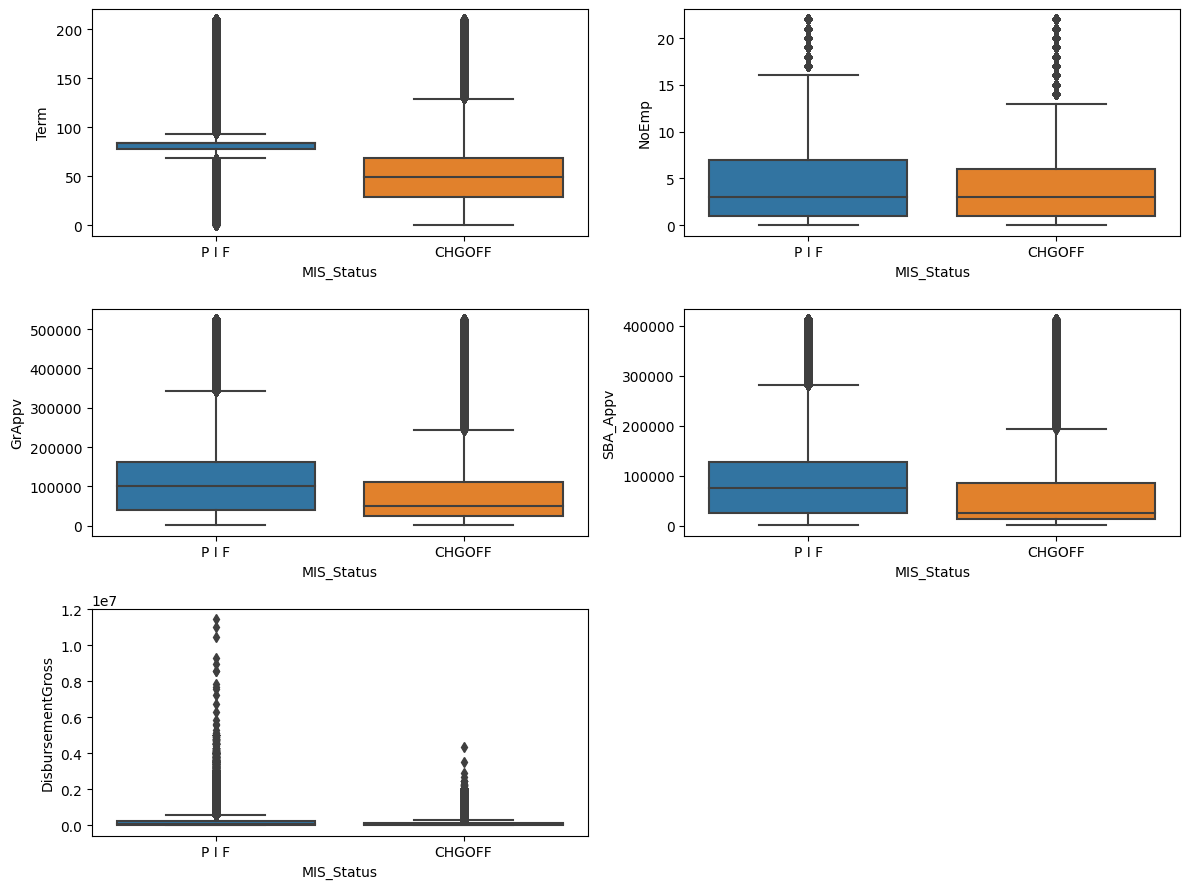

In [45]:
plt.figure(figsize=(12,9))
plt.subplot(321)
sns.boxplot(x='MIS_Status',y='Term',data=df)
plt.subplot(322)
sns.boxplot(x='MIS_Status',y='NoEmp',data=df)
plt.subplot(323)
sns.boxplot(x='MIS_Status',y='GrAppv',data=df)
plt.subplot(324)
sns.boxplot(x='MIS_Status',y='SBA_Appv',data=df)
plt.subplot(325)
sns.boxplot(x='MIS_Status',y='DisbursementGross',data=df)
plt.tight_layout()
plt.show()

###### observation:
    1.When term is more or(tenure of loan)have high chance of loan approval
    2.Customers who have more employess have good chance of loan approval
    3.Customers who have high GrAppv amount has more chance of loan approval
    4.Customers who have high SBA_Appv amount has more chance of loan approval
    5.Customer who got Amount doesnt have any effect in chance of loan approval

##### 3.1.2 DATA VISUALISATION OF discrete_numerical_varibale

In [46]:
discrete_numerical_varibale

['NewExist', 'CreateJob', 'UrbanRural', 'BalanceGross']

##### Univariate analysis

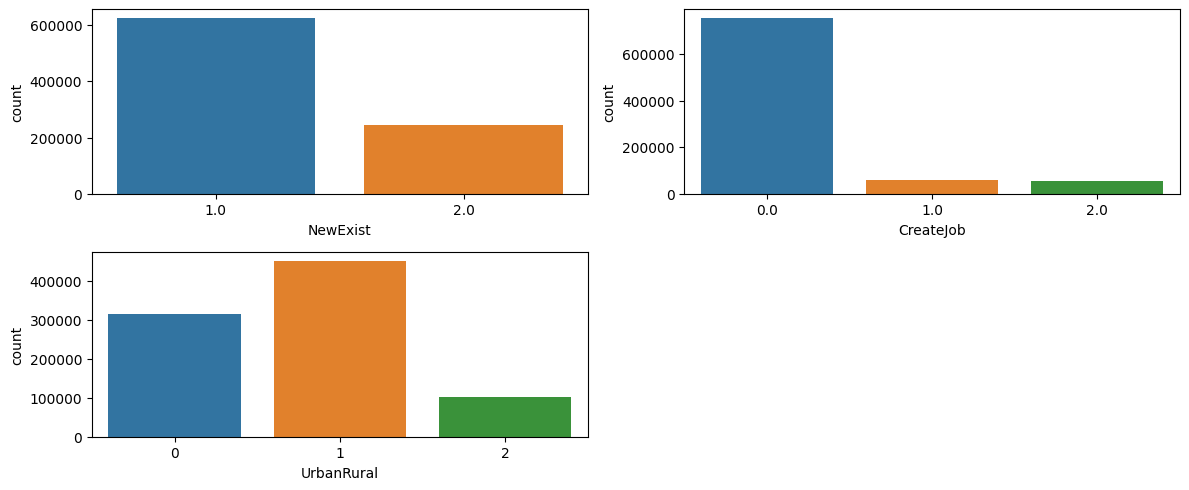

In [47]:
plt.figure(figsize=(12,7))
plt.subplot(321)
sns.countplot(x='NewExist',data=df)
plt.subplot(322)
sns.countplot(x='CreateJob',data=df)
plt.subplot(323)
sns.countplot(x='UrbanRural',data=df)
plt.tight_layout()
plt.show()

###### observation:
    1.Most borrowers have Existing business and they borrowed money for expanding business
    2.Most borrowers have created zero job
    3.Most borrowers have are from rural areas
    

##### Multivariate Analysis:
        How the discrete_numerical_variable on MIS_Status variable

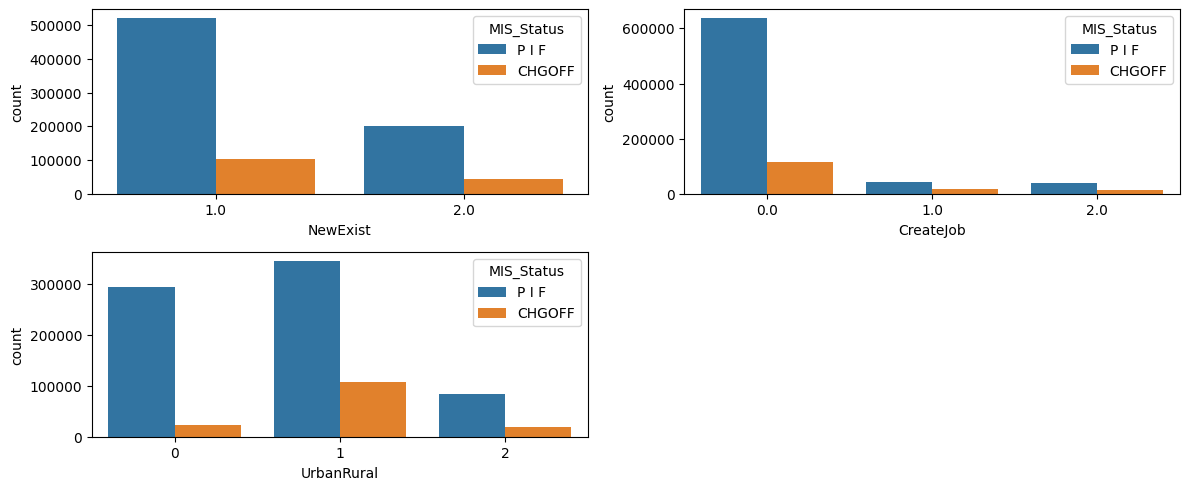

In [48]:
plt.figure(figsize=(12,7))
plt.subplot(321)
sns.countplot(x='NewExist',data=df,hue='MIS_Status')
plt.subplot(322)
sns.countplot(x='CreateJob',data=df,hue='MIS_Status')
plt.subplot(323)
sns.countplot(x='UrbanRural',data=df,hue='MIS_Status')
plt.tight_layout()
plt.show()

##### observation:
    1.Customer who have more existing business have more chance of loan approval
    2.Createjob has no effect on loan approval
    3.More urban customers have approved loan

##### 3.1.3 UNIVARAIATE ANALYSIS OF categorical_features

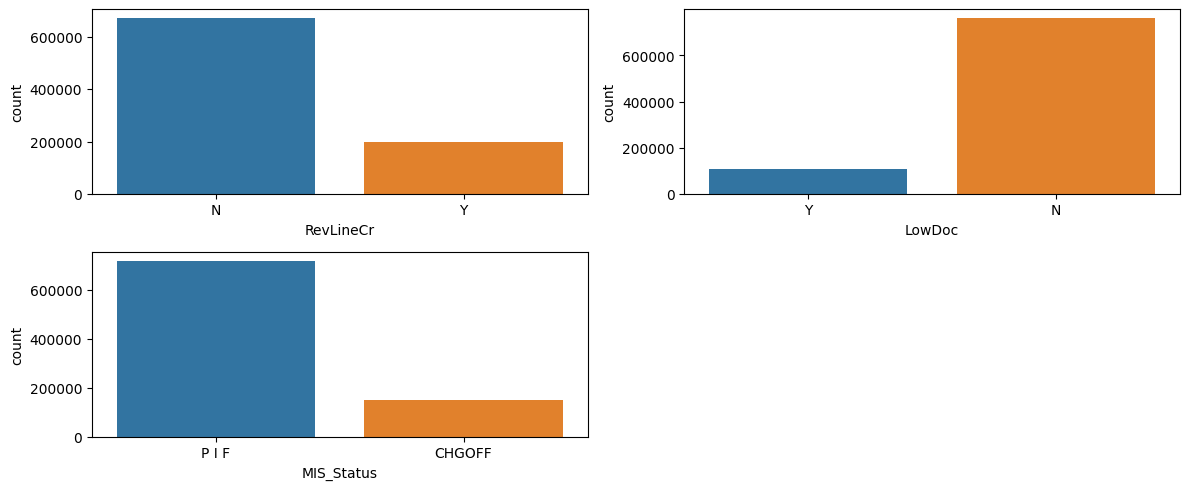

In [49]:
plt.figure(figsize=(12,7))
plt.subplot(321)
sns.countplot(x='RevLineCr',data=df)
plt.subplot(322)
sns.countplot(x='LowDoc',data=df)
plt.subplot(323)
sns.countplot(x='MIS_Status',data=df)
plt.tight_layout()
plt.show()

##### Observation:
    1.Most customers are not revolving the approval
    2.Most customer are for are not for lowDoc programme
    3. Most customer are approved for loan

In [50]:
df['MIS_Status'].value_counts(normalize=True)

P I F     0.828604
CHGOFF    0.171396
Name: MIS_Status, dtype: float64

##### Observation:
    There is imbalance dataset

##### Multivariate Analysis:
        How the categorical_features affect  on MIS_Status variable

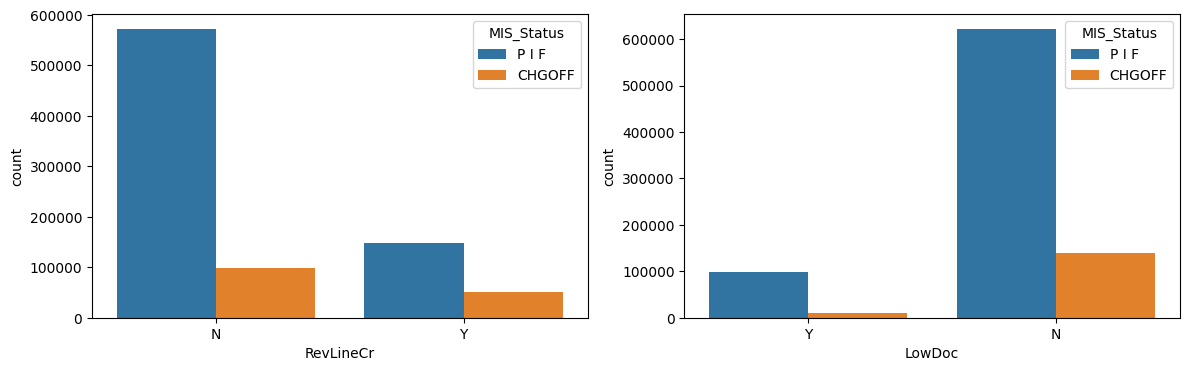

In [51]:
plt.figure(figsize=(12,7))
plt.subplot(221)
sns.countplot(hue='MIS_Status',x='RevLineCr',data=df)
plt.subplot(222)
sns.countplot(hue='MIS_Status',x='LowDoc',data=df)
plt.tight_layout()
plt.show()

##### Observation:
    1.Customers who have are not in revloving loan has high chance for loan approval
    2.Customer who have not for lowdocument programme have high chance for loan approval

##### 3.1.4 Correlation

<AxesSubplot: >

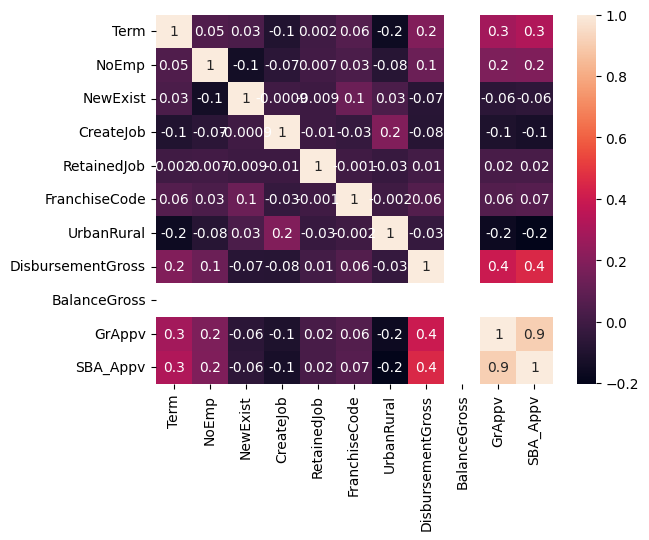

In [52]:
matrix=df.corr()
sns.heatmap(matrix,annot=True,fmt='.1g')

##### 4 Hypothesis Testing:
    This Hypothesis Testing give confidence of relation of Independent variable and target variable

##### 4.1 Hypothesis Testing Steps
 1.Hypothesis Statement
 
 2.Analysis plan formulation
 
 3.Analyze sample data
 
 4.Interpret the results


###### Normality tests:
    Since all the disturbution are not Gaussian disturbution that show in above graphs we go with 
    1.Non-Parametric tests

#### 4.1.1 Numerical_variables:
   

###### 1.Term

Our First Question is Term variable is stastically different form MIS_Status

###### a. Hypothesis Statement:
    Null Hypothesis (H0):There is no significant difference in the distribution of the Term and MIS_Status
    
    Alternative Hypothesis (Ha):There is significant difference in the distribution of the Term and MIS_Status
    
                         
    

###### b.Analysis plan formulation

###### 1.Significance_level: 
  Test our Hypothesis at 5% confidence interval
  
  2.Test Method:
      we use  Mann-Whitney U test which is non parametric test, which is used to compare two independent group which one numerical  variable and  categorical variable 
    

In [53]:
#creation of sample

dataset_1=df[['Term','MIS_Status']]


###### normality test:
    This done to variefy the numerical variable is gaussian disturbution or not

In [54]:
statistic, p_value = stats.shapiro(dataset_1['Term'])
print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)
alpha=0.05

if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject the null hypothesis).")
else:
    print("The data does not appear to be normally distributed (reject the null hypothesis).")

Shapiro-Wilk Test Statistic: 0.8996390104293823
p-value: 0.0
The data does not appear to be normally distributed (reject the null hypothesis).


C:\Users\HOME\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


###### observation:
  Since the sample is population size is more it may not be accurate
 

Text(0.5, 1.0, 'Q-Q plot')

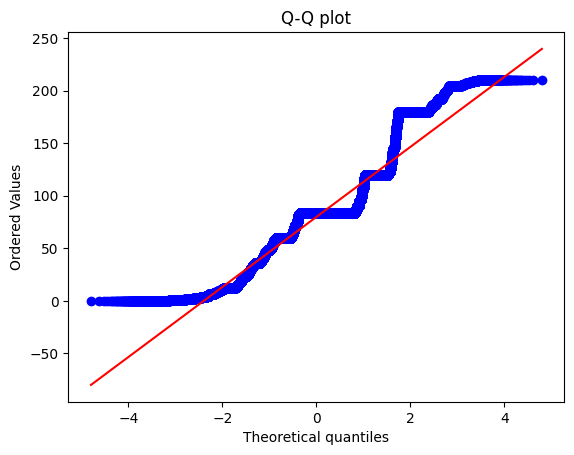

In [55]:
#create Q-Q plot
stats.probplot(df['Term'],dist='norm',plot=plt)
plt.title('Q-Q plot')

###### observation:
     we can see the disturbution is not normally disturbuted

In [56]:
group_pif = df[df['MIS_Status'] == 'P I F']['Term']
group_chgoff=df[df['MIS_Status'] == 'CHGOFF']['Term']

In [57]:
#Perform Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group_pif, group_chgoff)

print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in 'Term' between 'P I F' and 'CHGOFF'.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in 'Term' between 'P I F' and 'CHGOFF'.")

Mann-Whitney U statistic: 84587000250.5
p-value: 0.0
Reject the null hypothesis: There is a significant difference in 'Term' between 'P I F' and 'CHGOFF'.


##### observation:
    There is effect on MIS_Status on term 

###### 2.GrAppv
 Our second question is there any significant difference between GrAppv and MIS_Status

###### a.Hypothesis statment:
    
    Null_hypothesis(H0):There is no significance difference between GrAppv and MIS_Status
    
    Alternativ_hypothesis(Ha): There is significance difference between GrAppv and MIS_Status
        

###### b.Analysis of plan Formulation:
    a.Significance_level:We will test our hypothesis at 5% significance level
    b. Test_method:Mann-Whitney U test 

In [58]:
#lets check the GrApp is normally disturbuted or not
dataset_2=df[['GrAppv','MIS_Status']]

statistic, p_value = stats.shapiro(dataset_2['GrAppv'])
print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)
alpha=0.05

if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject the null hypothesis).")
else:
    print("The data does not appear to be normally distributed (reject the null hypothesis).")


Shapiro-Wilk Test Statistic: 0.8258512020111084
p-value: 0.0
The data does not appear to be normally distributed (reject the null hypothesis).


C:\Users\HOME\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Text(0.5, 1.0, 'Q-Q plot of GrAppv')

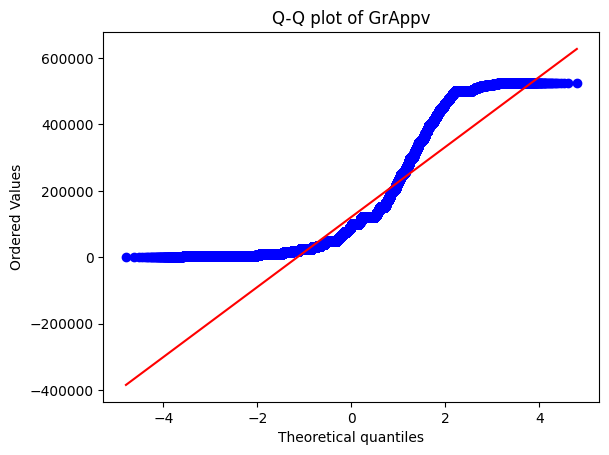

In [59]:
#lets check Q-Q plot
stats.probplot(df['GrAppv'],dist='norm',plot=plt)
plt.title('Q-Q plot of GrAppv')

###### observation:
    The varible GrAppv is not normal disturbuted

In [60]:
group_pif_1 = df[df['MIS_Status'] == 'P I F']['GrAppv']
group_chgoff_1=df[df['MIS_Status'] == 'CHGOFF']['GrAppv']

In [61]:
#Perform Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group_pif_1, group_chgoff_1)

print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in 'GrAppv' between 'P I F' and 'CHGOFF'.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in 'GrAppv' between 'P I F' and 'CHGOFF'.")

Mann-Whitney U statistic: 68292504133.0
p-value: 0.0
Reject the null hypothesis: There is a significant difference in 'GrAppv' between 'P I F' and 'CHGOFF'.


###### observation:
    There is Significance difference between GrAppv and MIS_Status

###### 3.SBA_Appv
  Our third question is that is there any significant difference between MIS_Status

###### a.Hypothesis statment:
    
    Null_hypothesis(H0):There is no significance difference between SBA_Appv and MIS_Status
    
    Alternativ_hypothesis(Ha): There is significance difference between SBA_Appv and MIS_Status
        

###### b.Analysis of plan Formulation:
    a.Significance_level:We will test our hypothesis at 5% significance level
    b. Test_method:Mann-Whitney U test 

In [62]:
#lets check the SBA_Appv is normally disturbuted or not
dataset_3=df[['SBA_Appv','MIS_Status']]

statistic, p_value = stats.shapiro(dataset_3['SBA_Appv'])
print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)
alpha=0.05

if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject the null hypothesis).")
else:
    print("The data does not appear to be normally distributed (reject the null hypothesis).")

Shapiro-Wilk Test Statistic: 0.8380419611930847
p-value: 0.0
The data does not appear to be normally distributed (reject the null hypothesis).


C:\Users\HOME\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Text(0.5, 1.0, 'Q-Q plot of SBA_Appv')

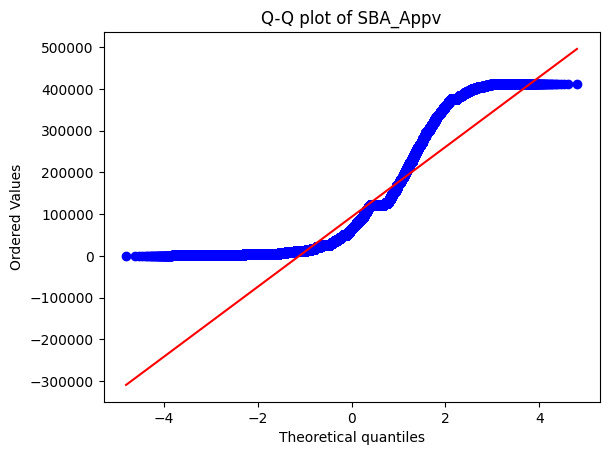

In [63]:
#lets check Q-Q plot
stats.probplot(df['SBA_Appv'],dist='norm',plot=plt)
plt.title('Q-Q plot of SBA_Appv')

###### observation:
    The disturbution is non-gaussian disturbution

In [64]:
group_pif_2 = df[df['MIS_Status'] == 'P I F']['SBA_Appv']
group_chgoff_2=df[df['MIS_Status'] == 'CHGOFF']['SBA_Appv']

In [65]:
#Perform Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group_pif_2, group_chgoff_2)
print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in 'SBA_Appv' between 'P I F' and 'CHGOFF'.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in 'SBA_Appv' between 'P I F' and 'CHGOFF'.")

Mann-Whitney U statistic: 69585422540.5
p-value: 0.0
Reject the null hypothesis: There is a significant difference in 'SBA_Appv' between 'P I F' and 'CHGOFF'.


###### observation:
    There is significant difference in the SBA_Appv and MIS_Status

###### 4.DisbursementGross
 Our Question is Isthere any significant difference bewteen DisbursementGross and MIS_Status

##### a.Hypothesis statment:
    
    Null_hypothesis(H0):There is no significance difference between DisbursementGross and MIS_Status
    
    Alternativ_hypothesis(Ha): There is significance difference between DisbursementGross and MIS_Status
        

###### b.Analysis of plan Formulation:
    a.Significance_level:We will test our hypothesis at 5% significance level
    b. Test_method:Mann-Whitney U test 

In [66]:
#lets check the SBA_Appv is normally disturbuted or not
dataset_4=df[['DisbursementGross','MIS_Status']]

statistic, p_value = stats.shapiro(dataset_4['DisbursementGross'])
print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)
alpha=0.05

if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject the null hypothesis).")
else:
    print("The data does not appear to be normally distributed (reject the null hypothesis).")

Shapiro-Wilk Test Statistic: 0.6337649822235107
p-value: 0.0
The data does not appear to be normally distributed (reject the null hypothesis).


C:\Users\HOME\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Text(0.5, 1.0, 'Q-Q plot of DisbursementGross')

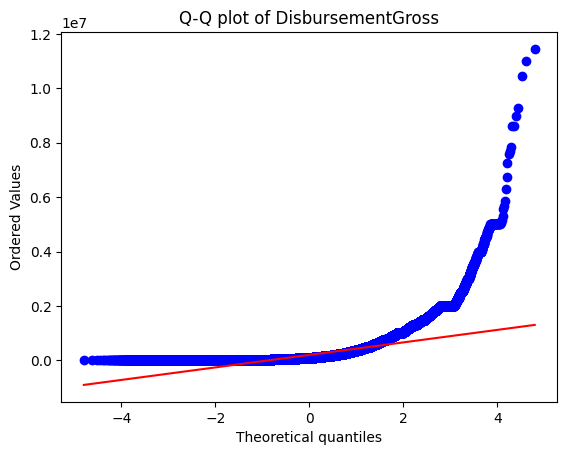

In [67]:
#lets check Q-Q plot
stats.probplot(df['DisbursementGross'],dist='norm',plot=plt)
plt.title('Q-Q plot of DisbursementGross')

###### observation:
    The DisbursementGross is non-Gaussian Disturbution

In [68]:
group_pif_3 = df[df['MIS_Status'] == 'P I F']['DisbursementGross']
group_chgoff_3=df[df['MIS_Status'] == 'CHGOFF']['DisbursementGross']

In [69]:
#Perform Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(group_pif_3, group_chgoff_3)
print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in 'SBA_Appv' between 'P I F' and 'CHGOFF'.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in 'SBA_Appv' between 'P I F' and 'CHGOFF'.")

Mann-Whitney U statistic: 65992388199.0
p-value: 0.0
Reject the null hypothesis: There is a significant difference in 'SBA_Appv' between 'P I F' and 'CHGOFF'.


###### observation:
    There is significant difference between DisbursementGross and MIS_Status

###### 4.1.2 categorical varibles

###### 1.NewExist
  Our first question is Isthere any significant different between NewExist and MIS_Status

###### a.Hypothesis statment:
    
    Null_hypothesis(H0):There is no significance difference between NewExist and MIS_Status
    
    Alternativ_hypothesis(Ha): There is significance difference between NewExist and MIS_Status

###### b.Analysis of plan Formulation:
    a.Significance_level:We will test our hypothesis at 5% significance level
    b.Test_method:Chi-squared test of independence which checks the relationship between NewExist and MIS_Status

In [70]:
contingency_table = pd.crosstab(df['NewExist'], df['MIS_Status'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between 'NewExist' and 'MIS_Status'.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between 'Variable1' and 'Variable2'.")

Chi-squared statistic: 372.3480984563565
Degrees of freedom: 1
p-value: 5.7669289449592594e-83
Reject the null hypothesis: There is a significant association between 'NewExist' and 'MIS_Status'.


###### observation:
    There is significant relationship between NewExist and MIS_Status

###### 2.CreateJob
  Our Second Question is that there is any significant relationship between CreateJob and MIS_Status

###### a.Hypothesis statment:
    
    Null_hypothesis(H0):There is no significance difference between CreateJob and MIS_Status
    
    Alternativ_hypothesis(Ha): There is significance difference between CreateJob and MIS_Status

###### b.Analysis of plan Formulation:
    a.Significance_level:We will test our hypothesis at 5% significance level
    b.Test_method:Chi-squared test of independence which checks the relationship between CreateJob and MIS_Status

###### 

In [71]:
contingency_table = pd.crosstab(df['CreateJob'], df['MIS_Status'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between ' CreateJob' and 'MIS_Status'.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between ' CreateJob' and 'MIS_Status'.")

Chi-squared statistic: 11374.894382103399
Degrees of freedom: 2
p-value: 0.0
Reject the null hypothesis: There is a significant association between ' CreateJob' and 'MIS_Status'.


###### observation:
    There is significant relationship between CreateJob and MIS_Status

In [72]:
#lets relationship by statstically
categorical_features

Index(['Name', 'City', 'State', 'Bank', 'BankState', 'ApprovalFY', 'RevLineCr',
       'LowDoc', 'MIS_Status'],
      dtype='object')

In [73]:
#we select perticlur features for hypthesis testing
x=['UrbanRural','RevLineCr','LowDoc']

In [74]:


def hypothesis_testing(column, df):
    print("Null hypothesis (H0): There is no significant difference between '{}' and 'MIS_Status'".format(column))
    print("Alternative hypothesis (Ha): There is a significant difference between '{}' and 'MIS_Status'".format(column))
    print("Significance level: We will test our hypothesis at a 5% significance level")
    print("Test method: Chi-squared test of independence, checking the relationship between '{}' and 'MIS_Status'".format(column))
    
    contingency_table = pd.crosstab(df[column], df['MIS_Status'])
    
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print("Chi-squared statistic:", chi2_stat)
    print("Degrees of freedom:", dof)
    print("p-value:", p_value)
    
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant association between '{}' and 'MIS_Status'".format(column))
    else:
        print("Fail to reject the null hypothesis: There is no significant association between '{}' and 'MIS_Status'".format(column))


###### 3.UrbanRural
  Our Question is there any signifiacant difference between UrbanRural and MIS_Status

In [75]:
hypothesis_testing('UrbanRural',df)

Null hypothesis (H0): There is no significant difference between 'UrbanRural' and 'MIS_Status'
Alternative hypothesis (Ha): There is a significant difference between 'UrbanRural' and 'MIS_Status'
Significance level: We will test our hypothesis at a 5% significance level
Test method: Chi-squared test of independence, checking the relationship between 'UrbanRural' and 'MIS_Status'
Chi-squared statistic: 36637.0097744402
Degrees of freedom: 2
p-value: 0.0
Reject the null hypothesis: There is a significant association between 'UrbanRural' and 'MIS_Status'


###### observation:
    There is significant difference between UrbanRural and MIS_Status

###### 4.RevLineCr
  Our Question is there any significant relationship between RevLineCr and MIS_Status

In [76]:
hypothesis_testing('RevLineCr',df)

Null hypothesis (H0): There is no significant difference between 'RevLineCr' and 'MIS_Status'
Alternative hypothesis (Ha): There is a significant difference between 'RevLineCr' and 'MIS_Status'
Significance level: We will test our hypothesis at a 5% significance level
Test method: Chi-squared test of independence, checking the relationship between 'RevLineCr' and 'MIS_Status'
Chi-squared statistic: 12908.417570357435
Degrees of freedom: 1
p-value: 0.0
Reject the null hypothesis: There is a significant association between 'RevLineCr' and 'MIS_Status'


###### observation:
    There is significant difference between RevLineCr and MIS_Status
    

###### 5.LowDoc
Our Question is there any significant relationship between LowDoc and MIS_Status

In [77]:
hypothesis_testing('LowDoc',df)

Null hypothesis (H0): There is no significant difference between 'LowDoc' and 'MIS_Status'
Alternative hypothesis (Ha): There is a significant difference between 'LowDoc' and 'MIS_Status'
Significance level: We will test our hypothesis at a 5% significance level
Test method: Chi-squared test of independence, checking the relationship between 'LowDoc' and 'MIS_Status'
Chi-squared statistic: 5557.412225605807
Degrees of freedom: 1
p-value: 0.0
Reject the null hypothesis: There is a significant association between 'LowDoc' and 'MIS_Status'


###### Observation:
    There is significant difference between LowDoc and MIS_Status

In [78]:
df.head()

,Name,City,State,Bank,BankState,ApprovalFY,Term,NoEmp,NewExist,CreateJob,...,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,GrAppv,SBA_Appv,Days_took_Disbursement
0,ABC HOBBYCRAFT,EVANSVILLE,IN,FIFTH THIRD BANK,OH,1997,84.0,4.0,2.0,0.0,...,1,0,N,Y,60000.0,0.0,P I F,60000.0,48000.0,730 days
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,1ST SOURCE BANK,IN,1997,60.0,2.0,2.0,0.0,...,1,0,N,Y,40000.0,0.0,P I F,40000.0,32000.0,92 days
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,GRANT COUNTY STATE BANK,IN,1997,180.0,7.0,1.0,0.0,...,1,0,N,N,287000.0,0.0,P I F,287000.0,215250.0,306 days
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,1ST NATL BK & TR CO OF BROKEN,OK,1997,60.0,2.0,1.0,0.0,...,1,0,N,Y,35000.0,0.0,P I F,35000.0,28000.0,122 days
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FLORIDA BUS. DEVEL CORP,FL,1997,84.0,14.0,1.0,0.0,...,1,0,N,N,229000.0,0.0,P I F,229000.0,229000.0,75 days


In [79]:
df.drop(['Name','City','State','Bank','ApprovalFY','FranchiseCode','BalanceGross','BankState'],axis=1,inplace=True)

In [80]:
df.head()

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv,Days_took_Disbursement
0,84.0,4.0,2.0,0.0,0,0,N,Y,60000.0,P I F,60000.0,48000.0,730 days
1,60.0,2.0,2.0,0.0,0,0,N,Y,40000.0,P I F,40000.0,32000.0,92 days
2,180.0,7.0,1.0,0.0,0,0,N,N,287000.0,P I F,287000.0,215250.0,306 days
3,60.0,2.0,1.0,0.0,0,0,N,Y,35000.0,P I F,35000.0,28000.0,122 days
4,84.0,14.0,1.0,0.0,7,0,N,N,229000.0,P I F,229000.0,229000.0,75 days


In [81]:
df.to_csv("Credit_Analysis.csv",index=False)

In [83]:
df.shape

(869181, 13)